Import packages

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # default figure size
plt.rcParams['font.size'] = 12           # default font size
plt.rcParams['font.family'] = 'Times New Roman'

Read data

In [10]:
data_path = '../data/energydata_complete_raw.csv'

df = pd.read_csv(data_path)
print("Raw size of the dataset:", df.shape)

print("First 5 rows of the dataset:")
print(df.head())

# remove columns "rv2"
df.drop(columns=['rv2'], inplace=True)
print("Cleaned size of the dataset:", df.shape)

Raw size of the dataset: (19735, 29)
First 5 rows of the dataset:
               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

  

Data info and description

In [11]:
print("Dataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  flo

Transform data column into datatime object

In [12]:
date_format = "%d-%m-%Y %H:%M"
df['date'] = pd.to_datetime(df['date'], format=date_format, errors='raise')

Target variable analysis (Appliances)

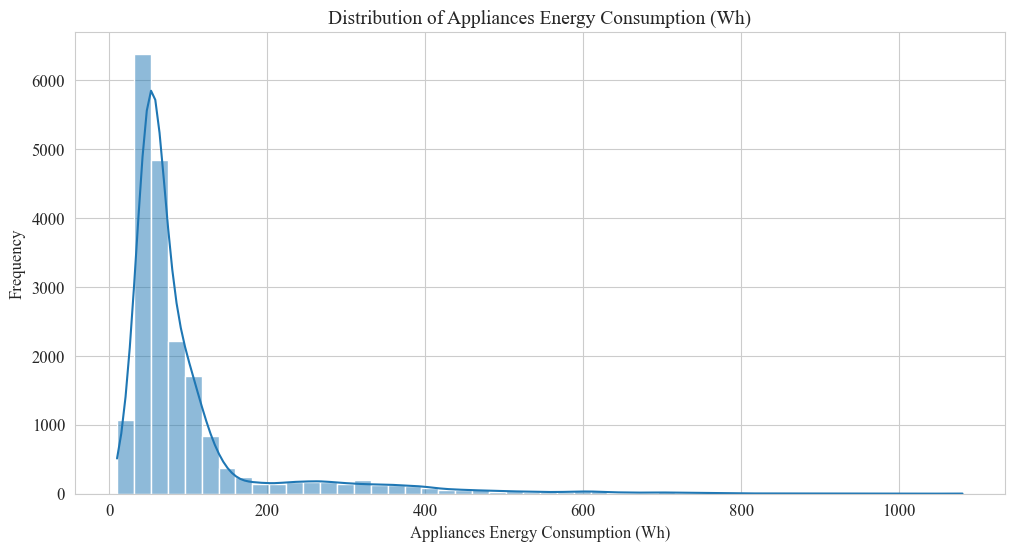

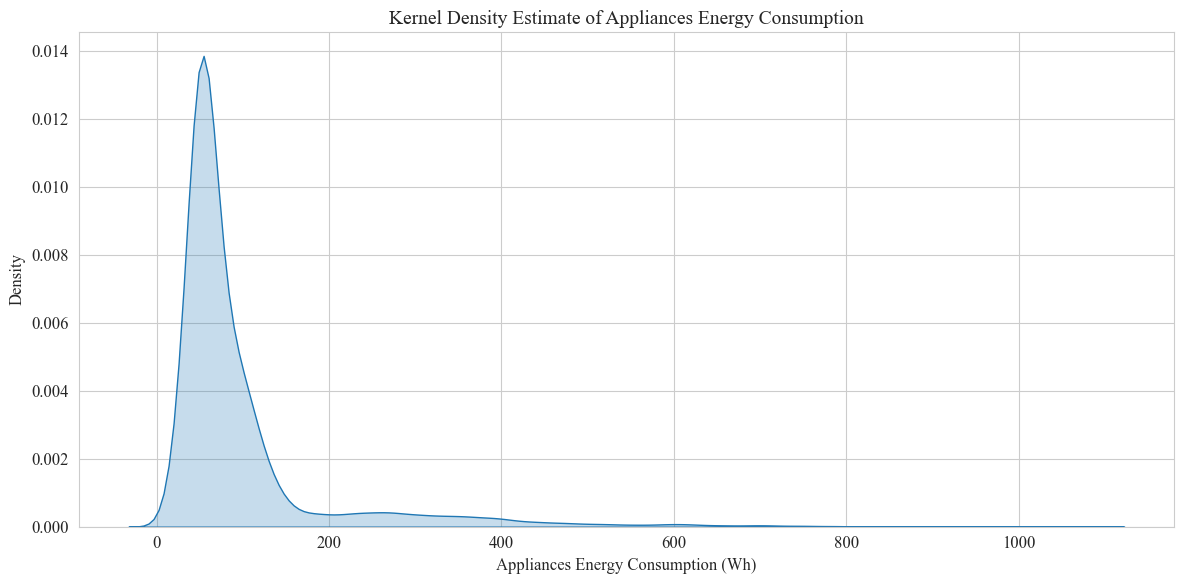


Appliances Descriptive Statistics:


count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

Skewness: 3.39
Kurtosis: 13.67


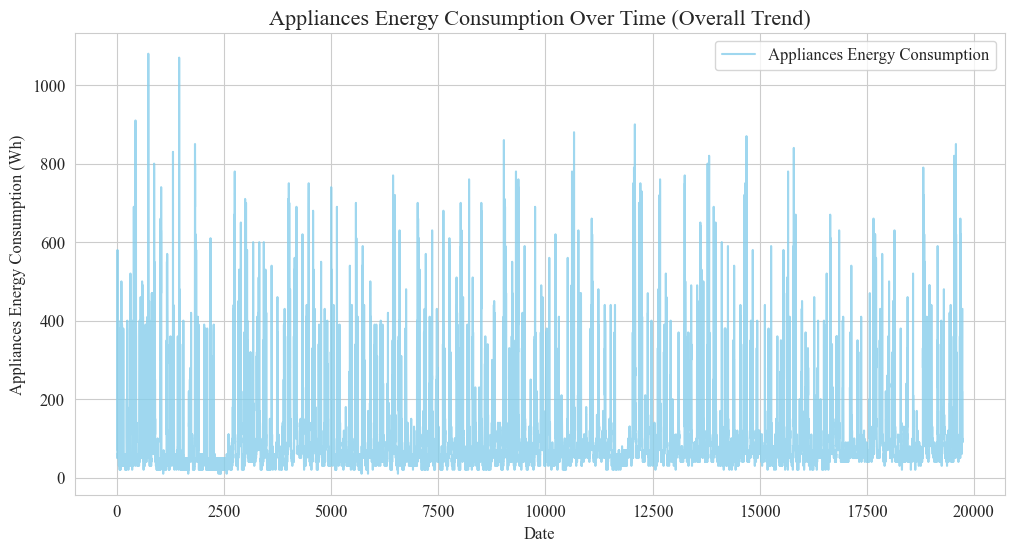

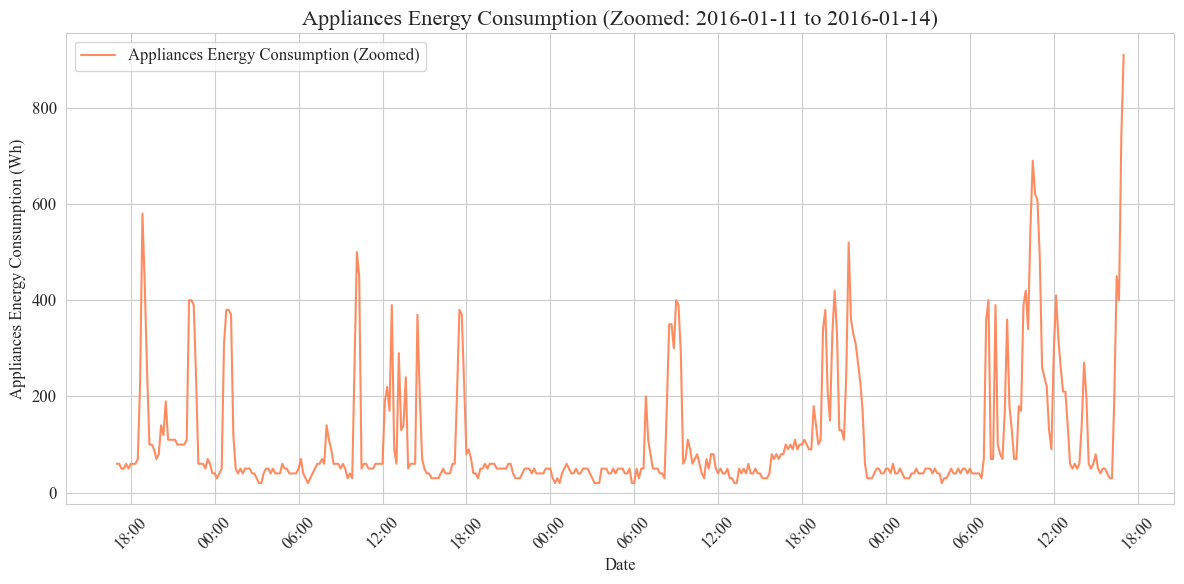

In [13]:
# Histogram and KDE plot for Appliances

# Histogram plot
plt.figure()
sns.histplot(df['Appliances'], kde=True, bins=50)
plt.title('Distribution of Appliances Energy Consumption (Wh)', fontsize=14)
plt.xlabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Kernel density estimate (KDE) plot
plt.figure()
sns.kdeplot(df['Appliances'], fill=True)
plt.title('Kernel Density Estimate of Appliances Energy Consumption', fontsize=14)
plt.xlabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.savefig('../results/eda_plots/appliances_distribution.png')
plt.show()





# Calculate descriptive statistics for Appliances
print("\nAppliances Descriptive Statistics:")
appliances_stats = df['Appliances'].describe()
appliances_skew = df['Appliances'].skew()
appliances_kurt = df['Appliances'].kurt()

display(appliances_stats)
print(f"Skewness: {appliances_skew:.2f}")
print(f"Kurtosis: {appliances_kurt:.2f}")



# Time series plot for Appliances
plt.figure()
plt.plot(df.index, df['Appliances'], label='Appliances Energy Consumption', color='skyblue', alpha=0.8)
plt.title('Appliances Energy Consumption Over Time (Overall Trend)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('../results/eda_plots/appliances_time_series_overall.png', dpi=300)
plt.show()



# Zoomed-in time series plot for Appliances (first 3 days)
start_date_zoom = df['date'].min()
end_date_zoom = start_date_zoom + pd.Timedelta(days=3)

# Extract the first 3 days of data
df_zoom = df[(df['date'] >= start_date_zoom) & (df['date'] <= end_date_zoom)]


plt.figure()
# Use df_zoom['date'] as the x-axis
plt.plot(df_zoom['date'],
            df_zoom['Appliances'],
            label='Appliances Energy Consumption (Zoomed)', color='coral', alpha=0.9)
plt.title(f'Appliances Energy Consumption (Zoomed: {start_date_zoom.strftime("%Y-%m-%d")} to {end_date_zoom.strftime("%Y-%m-%d")})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Appliances Energy Consumption (Wh)', fontsize=12)
plt.legend()
plt.grid(True)

# Set x-axis major ticks to hourly intervals
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.HourLocator(interval=6))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/eda_plots/appliances_time_series_zoomed.png', dpi=300)
plt.show()


Feature variable analysis

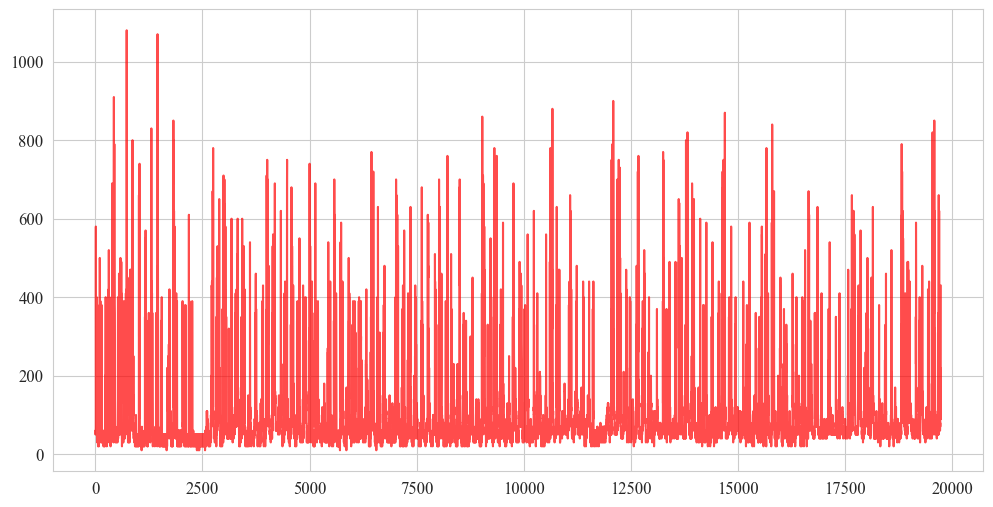

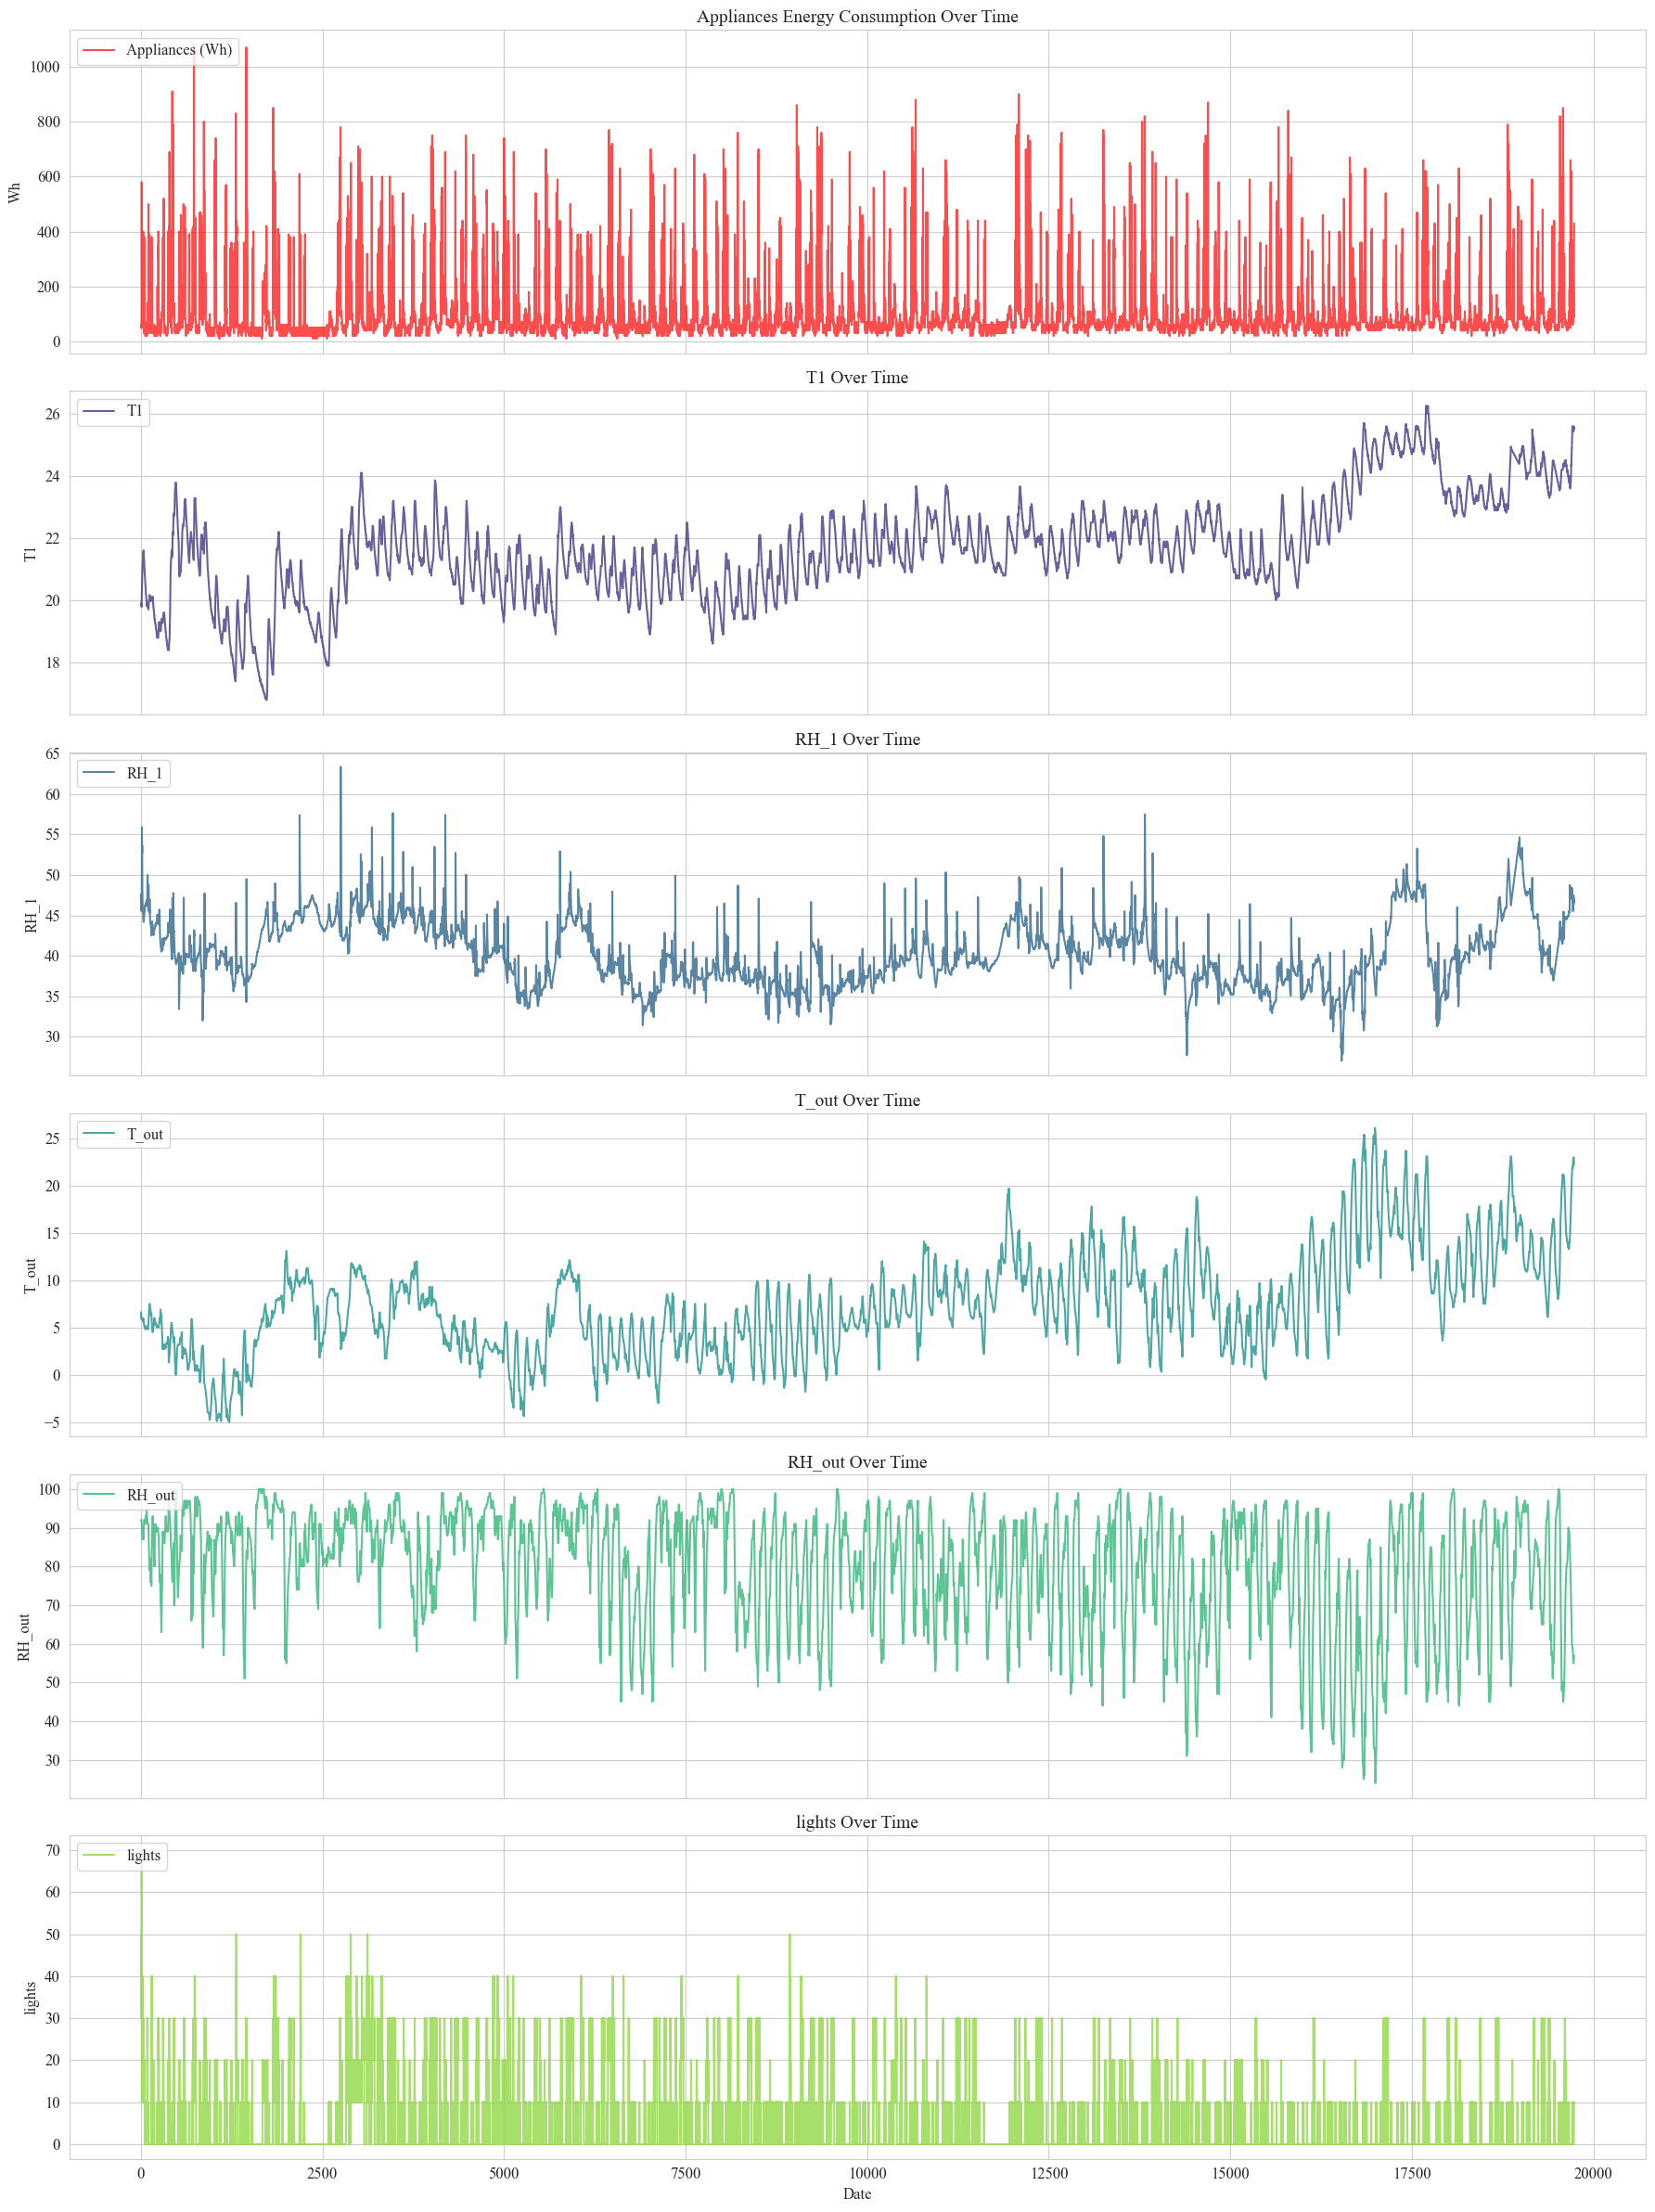

All count of lights: 19735
Count of lights = 0: 15252 (77.28%)
Count of lights > 0: 4483 (22.72%)


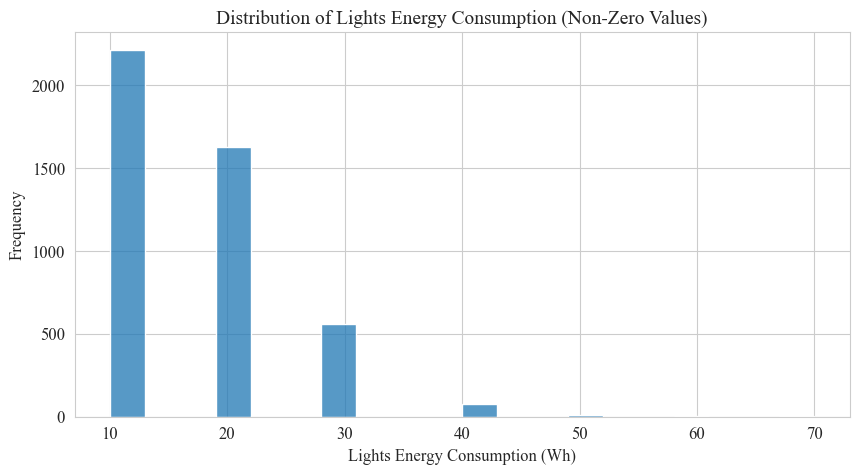

In [14]:
features = df.select_dtypes(include=np.number).columns.tolist()
features.remove('Appliances') # remove target variable

# for i, feature in enumerate(features):
#     plt.figure(figsize=(16, 6))

#     # kernel density estimate (KDE) plot
#     plt.subplot(1, 2, 1)
#     sns.histplot(df[feature], kde=True, bins=30)
#     plt.title(f'Distribution of {feature}', fontsize=14)
#     plt.xlabel(feature, fontsize=12)
#     plt.ylabel('Frequency', fontsize=12)

#     plt.tight_layout()
#     plt.show()



# Choose several key external features to observe their synchronicity with Appliances
key_external_features = ['T1', 'RH_1', 'T_out', 'RH_out', 'lights']

plt.figure()
plt.plot(df.index, df['Appliances'], label='Appliances (Wh)', color='red', alpha=0.7)

fig, axes = plt.subplots(len(key_external_features) + 1, 1, figsize=(18, 4 * (len(key_external_features) + 1)), sharex=True)

axes[0].plot(df.index, df['Appliances'], label='Appliances (Wh)', color='red', alpha=0.7)
axes[0].set_title('Appliances Energy Consumption Over Time', fontsize=14)
axes[0].set_ylabel('Wh', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(True)

for i, feature in enumerate(key_external_features):
    axes[i+1].plot(df.index, df[feature], label=feature, color=sns.color_palette("viridis", len(key_external_features))[i], alpha=0.8)
    axes[i+1].set_title(f'{feature} Over Time', fontsize=14)
    axes[i+1].set_ylabel(feature, fontsize=12)
    axes[i+1].legend(loc='upper left')
    axes[i+1].grid(True)

plt.xlabel('Date', fontsize=12)
plt.tight_layout()
plt.savefig('../results/eda_plots/appliances_and_external_features_time_series.png', dpi=300, bbox_inches='tight')
plt.show()



# Analyze 'lights' variable
lights_zero_count = (df['lights'] == 0).sum()
lights_non_zero_count = (df['lights'] > 0).sum()
total_count = len(df)

print(f"All count of lights: {total_count}")
print(f"Count of lights = 0: {lights_zero_count} ({lights_zero_count/total_count:.2%})")
print(f"Count of lights > 0: {lights_non_zero_count} ({lights_non_zero_count/total_count:.2%})")

plt.figure(figsize=(10, 5))
sns.histplot(df['lights'][df['lights'] > 0], bins=20, kde=False) # 只看非零值
plt.title('Distribution of Lights Energy Consumption (Non-Zero Values)', fontsize=14)
plt.xlabel('Lights Energy Consumption (Wh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# plt.grid(True)
plt.show()

Relationship between features and target variables

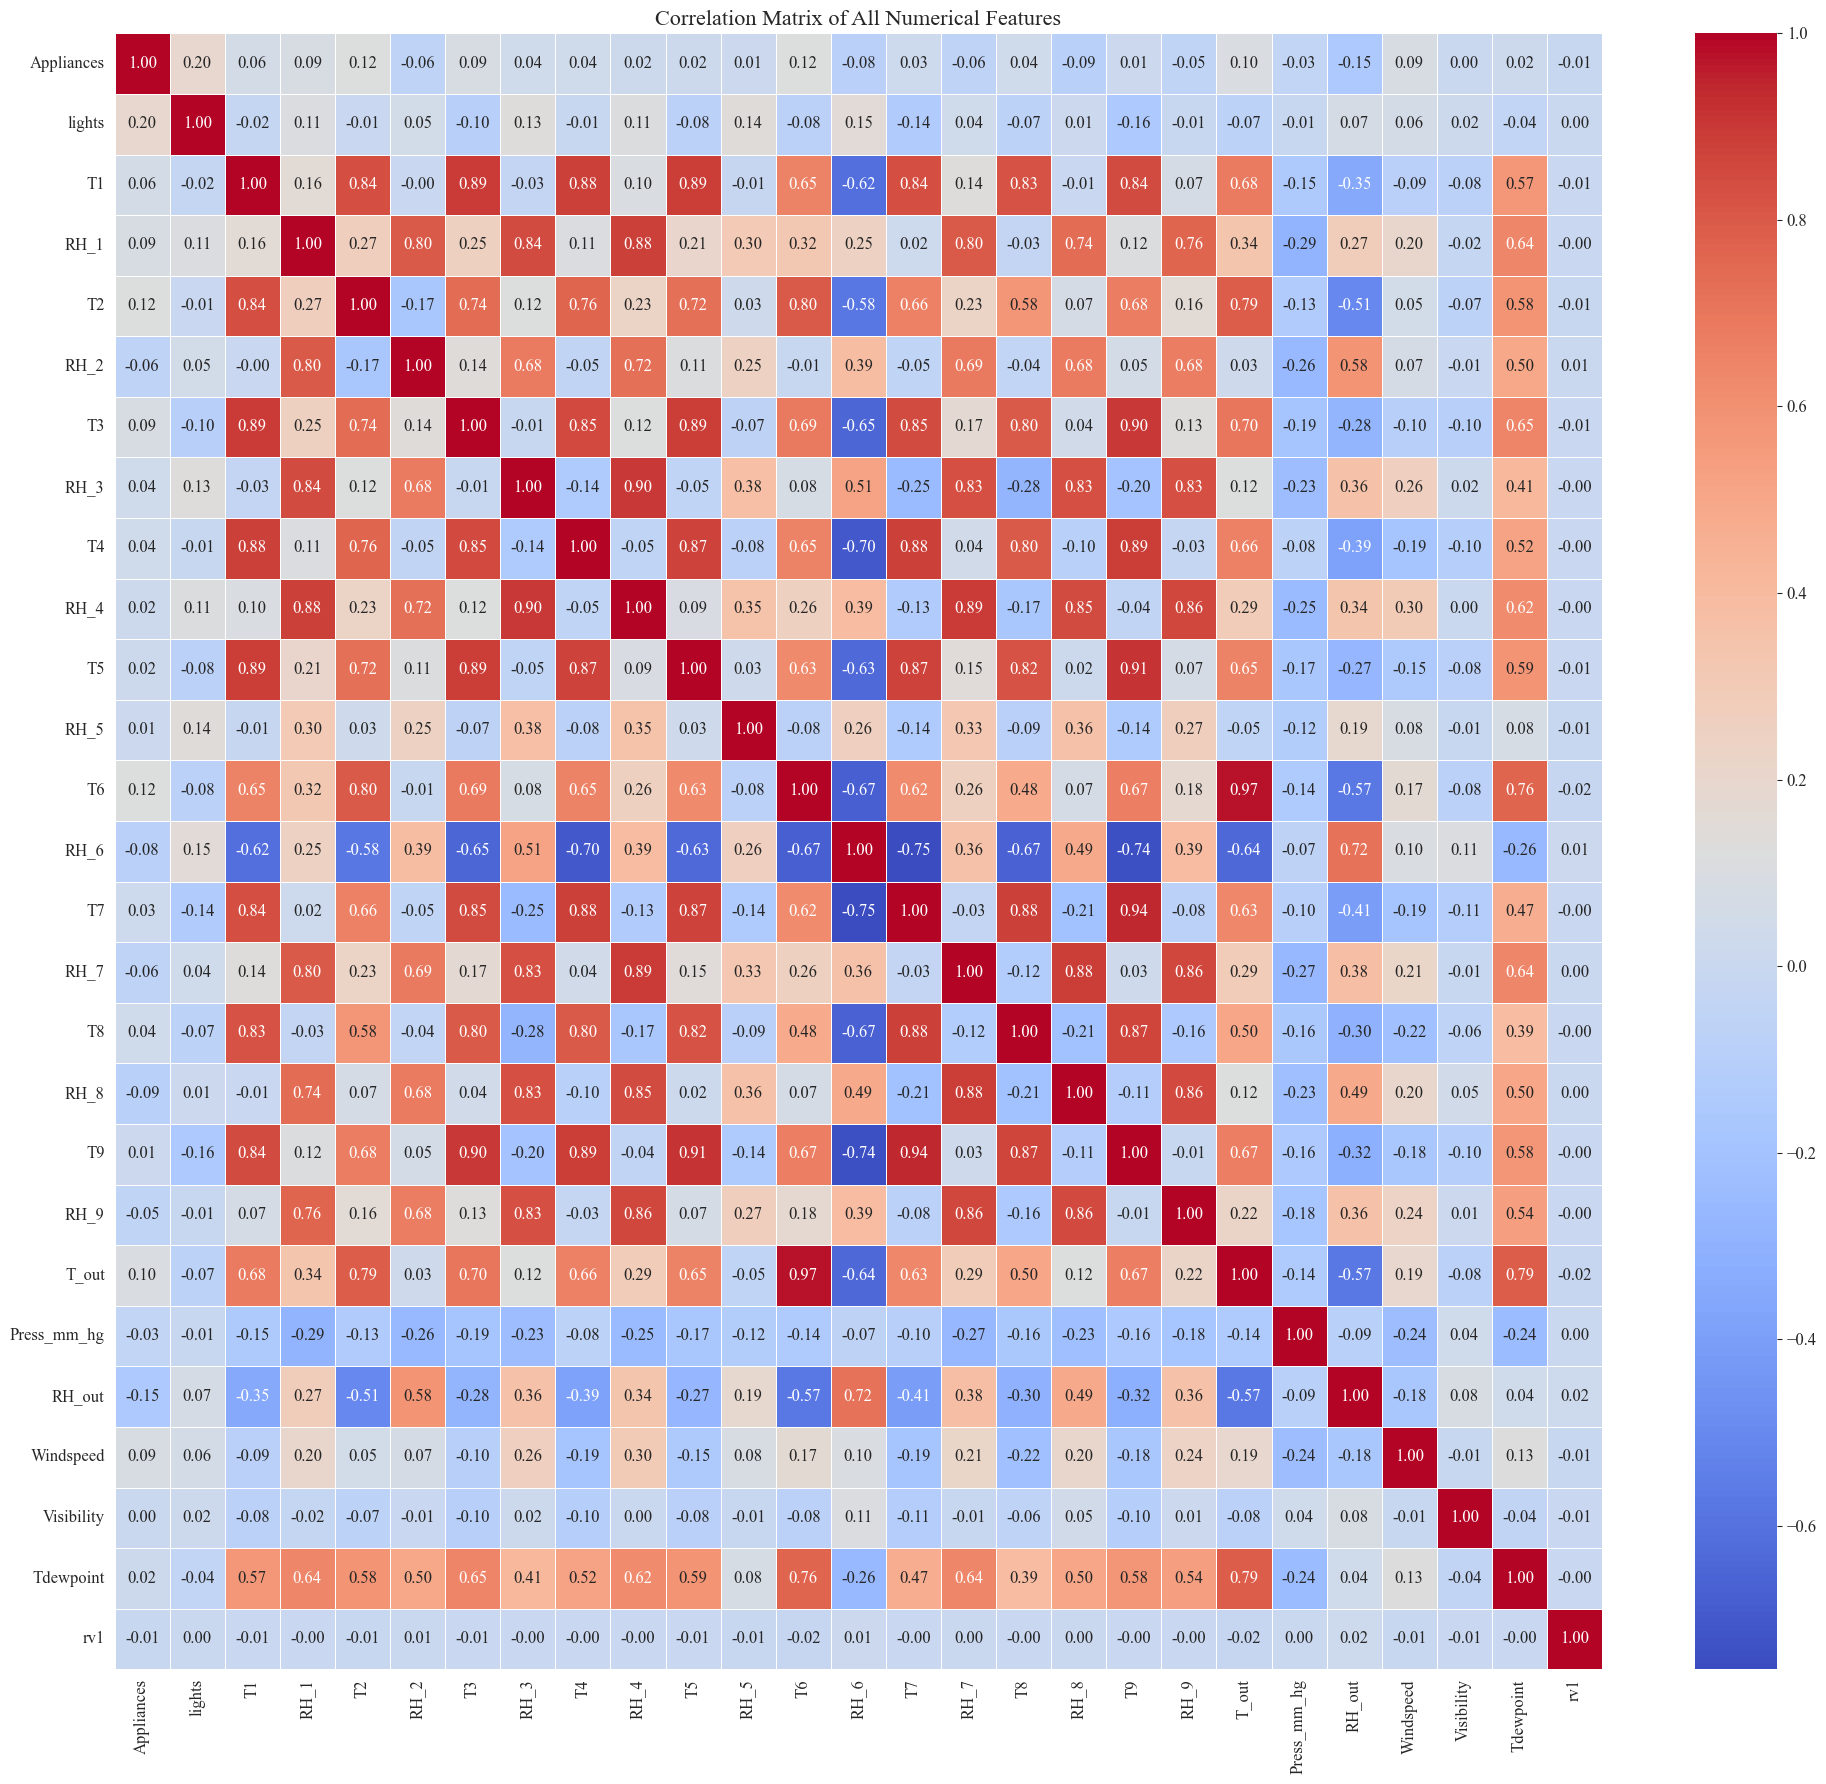

In [15]:
df_corr = df.copy()

correlation_matrix = df_corr.select_dtypes(include=np.number).corr()

appliances_correlations = correlation_matrix['Appliances'].sort_values(ascending=False)

# Hitmap of the full correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../results/eda_plots/correlation_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Time-based pattern exploration

,Appliances,hour_of_day,day_of_week,month_of_year
0,60,17,0,1
1,60,17,0,1
2,50,17,0,1
3,50,17,0,1
4,60,17,0,1


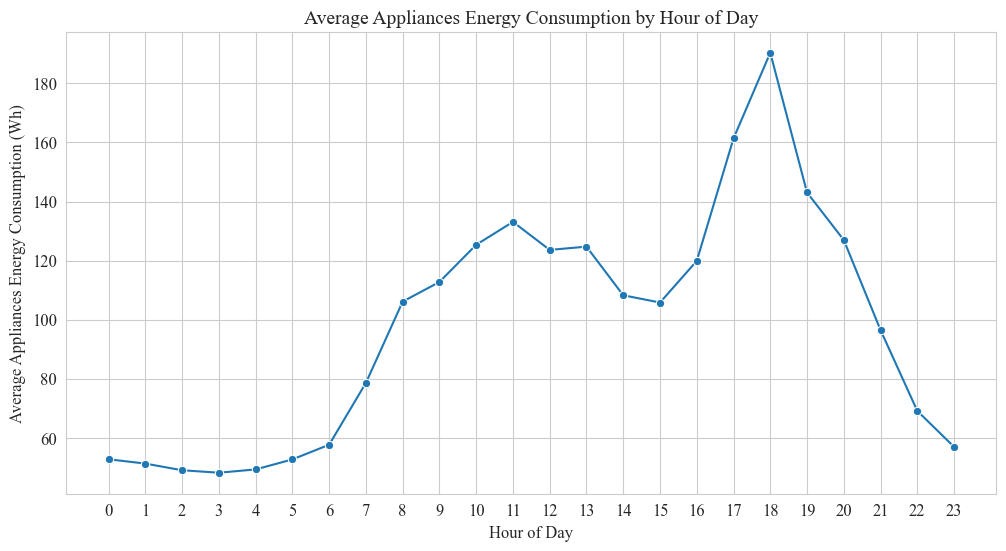

/var/folders/0c/4x3hnpm95fn764y5jnd03_m40000gn/T/ipykernel_3016/1339843104.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_appliances_by_dayofweek.index, y=avg_appliances_by_dayofweek.values, palette='viridis')


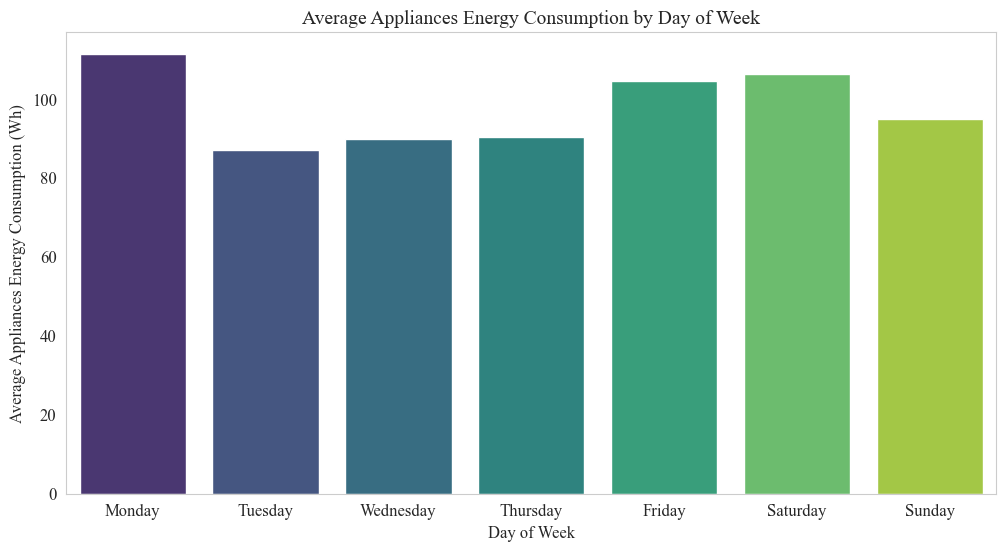

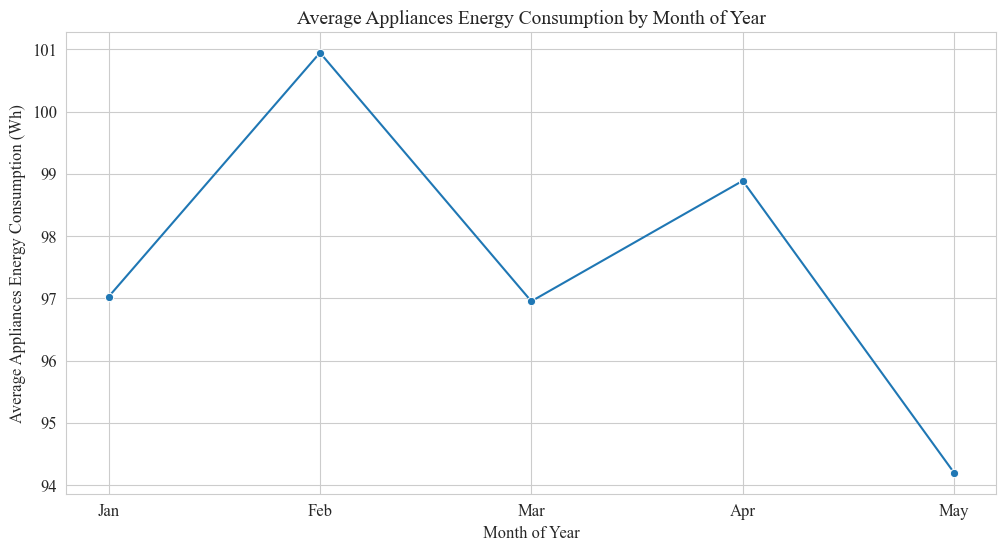

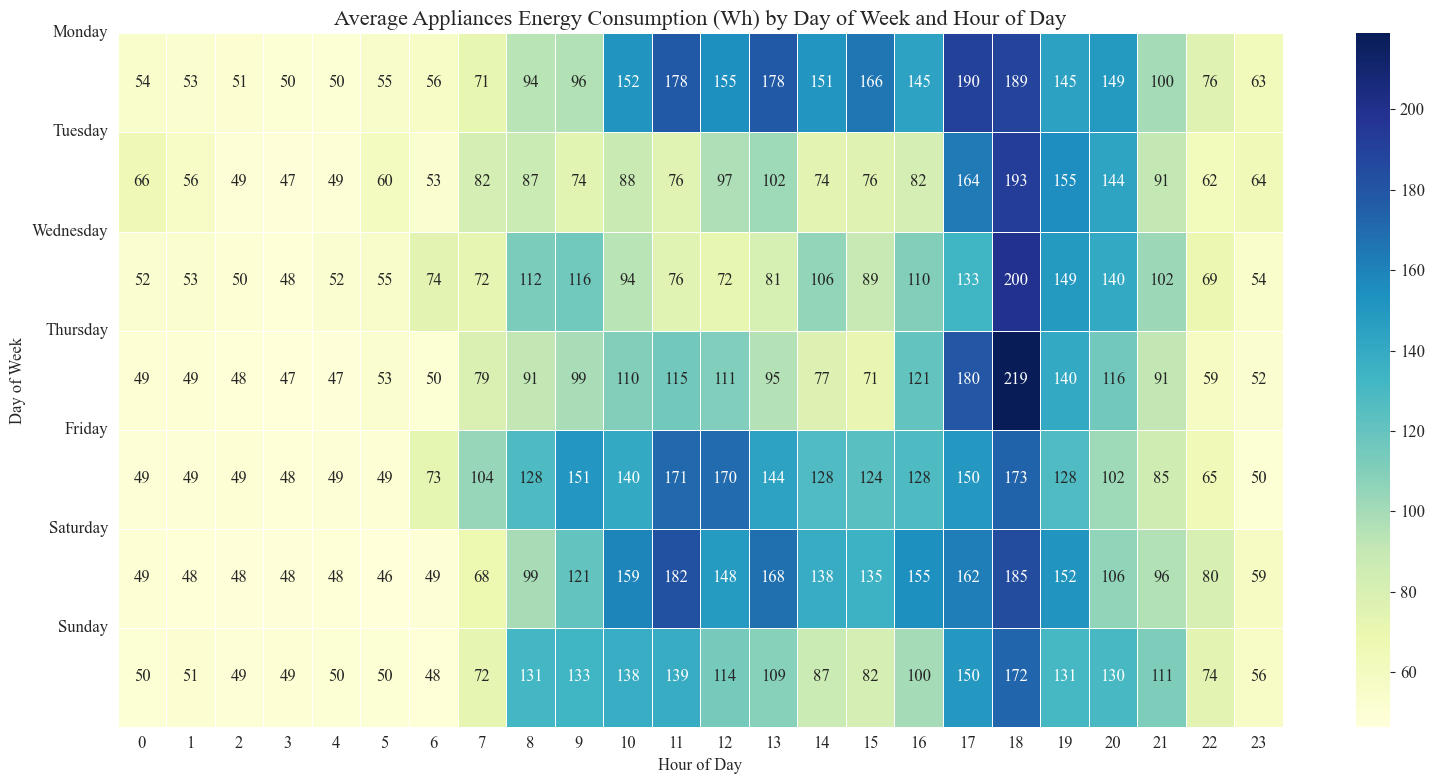

In [16]:
# Extract time-based features from the DataFrame's datetime index
df['hour_of_day'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek # Monday:0, Sunday:6
df['month_of_year'] = df['date'].dt.month

display(df[['Appliances', 'hour_of_day', 'day_of_week', 'month_of_year']].head())


# Avg Appliances consumption by time units
avg_appliances_by_hour = df.groupby('hour_of_day')['Appliances'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_appliances_by_hour.index, y=avg_appliances_by_hour.values, marker='o')
plt.title('Average Appliances Energy Consumption by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Appliances Energy Consumption (Wh)', fontsize=12)
plt.xticks(range(0, 24)) # Make sure all hours are shown on x-axis
plt.grid(True)
plt.savefig('../results/eda_plots/avg_appliances_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()


# Avg Appliances consumption by day of week
avg_appliances_by_dayofweek = df.groupby('day_of_week')['Appliances'].mean()
# Transform numbers to day names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_appliances_by_dayofweek.index = avg_appliances_by_dayofweek.index.map(lambda x: day_names[x])

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_appliances_by_dayofweek.index, y=avg_appliances_by_dayofweek.values, palette='viridis')
plt.title('Average Appliances Energy Consumption by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Appliances Energy Consumption (Wh)', fontsize=12)
plt.grid(axis='y')
plt.show()


# Avg Appliances consumption by month of year
avg_appliances_by_month = df.groupby('month_of_year')['Appliances'].mean()
# Transform numbers to month names for better readability
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_appliances_by_month.index = avg_appliances_by_month.index.map(lambda x: month_names[x-1]) # 月份从1开始

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_appliances_by_month.index, y=avg_appliances_by_month.values, marker='o')
plt.title('Average Appliances Energy Consumption by Month of Year', fontsize=14)
plt.xlabel('Month of Year', fontsize=12)
plt.ylabel('Average Appliances Energy Consumption (Wh)', fontsize=12)
plt.grid(True)
plt.show()


# Calculate average Appliances consumption by day of week and hour of day
avg_appliances_hourly_daily = df.groupby(['day_of_week', 'hour_of_day'])['Appliances'].mean().unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(avg_appliances_hourly_daily, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Appliances Energy Consumption (Wh) by Day of Week and Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(ticks=np.arange(len(day_names)), labels=day_names, rotation=0) # Make sure Y-axis labels are correct
plt.tight_layout()
plt.show()

# Clean up temporary time-based features created for EDA to avoid affecting subsequent steps, as these will be recreated in the feature engineering module
df.drop(columns=['hour_of_day', 'day_of_week', 'month_of_year'], inplace=True)
